In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## **Soal**
1. Buat Data Frame (1000, 5) dan berisi angka acak antara 0 dan 100
2. Identifikasi Outlier dalam DataFrame tersebut menggunakan metode statistik yang sesuai
3. Jelaskan alasan mengapa nilai-nilai tersebut dianggap outlier

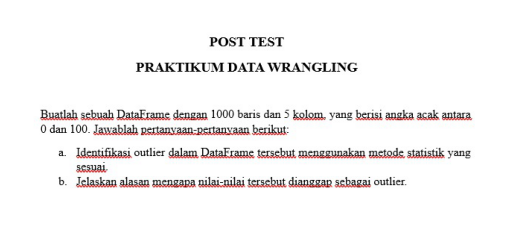

In [13]:
plt.imshow(mpimg.imread("image/soal.jpg"))
plt.axis("off")
plt.show()

# **Outlier**

## **Apa itu?**
- outlier adalah sebuah data yang menyimpang secara ekstrim dari rata-rata sekumpulan data yang ada.
- Penyimpangan ini bisa berupa angkanya terlalu tinggi atau terlalu rendah.
<br>
### **Contoh Kasus** <br>
Kamu sedang memeriksa data yang berisi informasi mengenai tinggi badan siswa kelas 6 di salah satu sekolah dasar. 
| Nama | Tinggi|
| ----------- | ----------- |
| Budi | `9cm` |
| Budi | 147cm |
| Budi | 150cm |
| Budi | 151cm |
| Budi | 155cm |
| Dodi | `619cm` |

nah **9cm** dan **619cm** adalah outlier



## **Kenapa Peduli dengan Outlier?**
### **Karena outlier berpengaruh terhadap:** 
- #### **Statistik** <br>
> Jika ada outlier yang ekstrem, rata-rata dapat menjadi bias atau tidak mencerminkan secara akurat karakteristik sebenarnya dari data tersebut. 
- #### **Analisis Model** <br>
> Misalnya, dalam regresi linier, outlier dapat mempengaruhi garis regresi dan menghasilkan perkiraan yang tidak akurat. 
- #### **Informasi Penting** <br>
> Outlier dapat mengindikasikan adanya kesalahan pengukuran, peristiwa langka, atau situasi penting lainnya.
- #### **Keputusan** <br>
> Jika outlier mencerminkan situasi yang penting, mengabaikannya dapat menghasilkan kesimpulan yang salah atau keputusan yang tidak tepat. 

## **Bagaimana Cara Menganalisa Outlier?**

### **1. Pendekatan Grafis**
> boxplot, scatter, spin plot
### **2. Pendekatan Statistik**
> IQR, Z-Score, Hampel, Kernel Density
### **3. Pendekatan Model**
> Regresi, Clustering, Density 
### **4. Pendekatan Jarak**
> Jarak Terdekat (Nearest-Neighbor based), Jarak Terpusat (Center based) <br> (jarak terpusat dianggap juka termasuk pendekatan statistik)

## **Let's Code**

### 1. Buat Data Frame (1000, 5) dan berisi angka acak antara 0 dan 100

In [14]:
# Membuat data angka acak antara 0 dan 100
np.random.seed(42)
data = np.random.randint(0, 100, size=(1000, 5))

# Membuat Data Frame dari data
df = pd.DataFrame(data, columns=['Kolom 1', 'Kolom 2', 'Kolom 3', 'Kolom 4', 'Kolom 5'])

# Menampilkan beberapa baris pertama dari Data Frame
print(df.shape)
print(df.head())

(1000, 5)
   Kolom 1  Kolom 2  Kolom 3  Kolom 4  Kolom 5
0       51       92       14       71       60
1       20       82       86       74       74
2       87       99       23        2       21
3       52        1       87       29       37
4        1       63       59       20       32


### 2. Identifikasi Outlier dalam DataFrame tersebut menggunakan metode statistik yang sesuai


#### **A. Menggunakan Interquartile Range (IQR)**

##### **Apa itu IQR?**
- IQR adalah ukuran statistik yang digunakan untuk mengukur sebaran atau penyebaran data dalam sebuah set data. <br>
- IQR dihitung dengan mengambil perbedaan antara kuartil atas (Q3) dan kuartil bawah (Q1) dari data.  <br>
- Kuartil adalah titik data yang membagi data menjadi empat bagian sama besar.

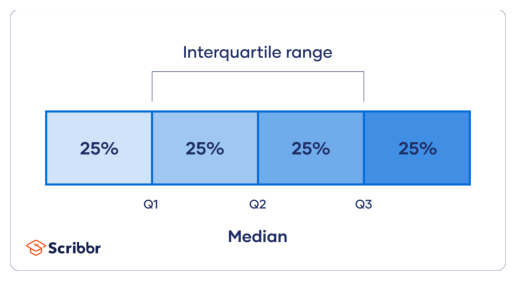

In [15]:
plt.imshow(mpimg.imread("image/iqr.jpg"))
plt.axis("off")
plt.show()

##### **Formula menghitung IQR**
**IQR = Q<sub>3</sub> - Q<sub>1</sub>**

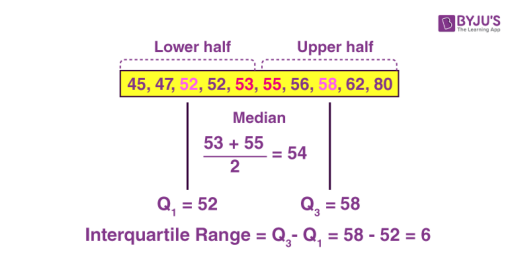

In [16]:
plt.imshow(mpimg.imread("image/iqr-formula.jpg"))
plt.axis("off")
plt.show()

##### **Rules**
- Sebuah nilai dianggap sebagai outlier jika jaraknya lebih besar dari 1,5 kali IQR dari Q1 dan Q3. 
- Dalam kata lain, nilai-nilai di bawah Q1 - 1,5 x IQR atau di atas Q3 + 1,5 x IQR dianggap sebagai outlier.

##### **Implement**

In [17]:
df.head()

,Kolom 1,Kolom 2,Kolom 3,Kolom 4,Kolom 5
0,51,92,14,71,60
1,20,82,86,74,74
2,87,99,23,2,21
3,52,1,87,29,37
4,1,63,59,20,32


In [18]:
def find_outliers(data):
    outliers = []
    for column in data.columns:
        # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)

        # Menghitung rentang IQR
        iqr = q3 - q1

        # Menghitung batas bawah dan batas atas untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Menemukan outlier dalam kolom
        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        
        # Menyimpan outlier dalam list outliers
        outliers.append(column_outliers)

    return outliers

In [19]:
# Mencari outlier
outliers = find_outliers(df)

# Menampilkan outlier dalam setiap kolom
for i, column in enumerate(df.columns):
    print(f"Outlier dalam {column}:")
    print(outliers[i])
    print()

Outlier dalam Kolom 1:
Empty DataFrame
Columns: [Kolom 1, Kolom 2, Kolom 3, Kolom 4, Kolom 5]
Index: []

Outlier dalam Kolom 2:
Empty DataFrame
Columns: [Kolom 1, Kolom 2, Kolom 3, Kolom 4, Kolom 5]
Index: []

Outlier dalam Kolom 3:
Empty DataFrame
Columns: [Kolom 1, Kolom 2, Kolom 3, Kolom 4, Kolom 5]
Index: []

Outlier dalam Kolom 4:
Empty DataFrame
Columns: [Kolom 1, Kolom 2, Kolom 3, Kolom 4, Kolom 5]
Index: []

Outlier dalam Kolom 5:
Empty DataFrame
Columns: [Kolom 1, Kolom 2, Kolom 3, Kolom 4, Kolom 5]
Index: []



##### **Gunakan dataset Alternatif**

In [20]:
df_alt = pd.read_excel("ALT.xlsx")
df_alt.head()

,ssc_p,degree_p,salary
0,67.00,58.00,270000
1,79.33,77.48,200000
2,65.00,64.00,250000
3,56.00,52.00,0
4,85.80,73.30,425000


In [22]:
# Mencari outlier
alt_outliers = find_outliers(df_alt)

# Menampilkan outlier dalam setiap kolom
for i, column in enumerate(df_alt.columns):
    print(f"Outlier dalam {column}:")
    print(alt_outliers[i])
    print()

Outlier dalam ssc_p:
        ssc_p  degree_p  salary
15     6.0000     69.00  200000
22    14.5630     72.23  360000
46   510.0000     65.60       0
79    33.0000     66.00       0
106   12.0000     54.00       0
210   12.7683     77.60  400000

Outlier dalam degree_p:
     ssc_p  degree_p     salary
43   87.00    -968.0     300000
48   63.00      10.0     250000
70   82.00    -890.0     360000
96   76.00     810.0     300000
180  65.00      22.0  265000000
197  83.96      91.0     260000
206  41.00      37.0          0

Outlier dalam salary:
     ssc_p  degree_p      salary
56    63.0     61.40   -24000000
119   60.8     64.60      940000
156   84.2     65.00     2550000
162   74.2     77.25     2850000
177   73.0     79.00  6500000000
178   68.0     68.00  3500000000
180   65.0     22.00   265000000
183   65.0     69.00   276000000
185   88.0     78.00   252000000
187   78.5     67.00     2800500
211   58.0     72.00   275000000



##### **Kesimpulan**
- Baris dikatakan outlier apabila nilai IQR diluar rentang lower bound - upper bound
- Dalam metode IQR, outlier diidentifikasi berdasarkan ukuran perbedaan nilai dengan kuartil pertama (Q1) dan kuartil ketiga (Q3). 
- Rentang IQR mencakup 50% data di tengah distribusi data. 
- Jika suatu nilai melebihi batas atas (Q3 + 1.5 * IQR) atau kurang dari batas bawah (Q1 - 1.5 * IQR), maka nilai tersebut dianggap sebagai outlier.

##### **Apa yang harus kita lakukan pada outlier?**
1. Evaluasi Keandalan Outlier
2. Perbaiki Outlier
3. Hapus Outlier
4. Analisis Lanjutan
5. Visualisasi dan Pelaporan

##### Menghapus Outlier

In [23]:
def remove_outliers(data):
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk setiap kolom
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Menghitung rentang IQR untuk setiap kolom
    iqr = q3 - q1

    # Menghitung batas bawah dan batas atas untuk outlier untuk setiap kolom
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Menghapus baris yang mengandung outlier
    data_clean = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

    return data_clean

##### Imputasi dengan Nilai Logaritma
- Transformasi logaritma sering digunakan untuk mengatasi ketidakseimbangan atau skewness pada distribusi data. <br>
- Dengan menerapkan transformasi logaritma pada data yang bersih (setelah outlier dihapus) <br>
- Anda dapat menghasilkan distribusi yang lebih simetris dan lebih memenuhi asumsi statistik tertentu.<br>
- Transformasi logaritma dapat membantu memperbaiki sebaran data dan meningkatkan performa analisis statistik atau model prediktif yang akan diterapkan pada data tersebut.

In [24]:
def impute_with_log(data, columns):
    # Mengimputasi data yang bersih dengan logaritma
    data_imputed = data.copy()
    for column in columns:
        valid_values = data_imputed[column] > 0
        data_imputed.loc[valid_values, column] = np.log(data_imputed.loc[valid_values, column])

    return data_imputed

In [27]:
# Menghapus outlier dari dataframe
data_clean = remove_outliers(df_alt)

# Mengimputasi data yang bersih dengan logaritma
columns_to_impute = ['ssc_p', 'degree_p', 'salary']
data_imputed = impute_with_log(data_clean, columns_to_impute)

# Menampilkan hasil
print("Data Bersih Setelah Menghapus Outlier:")
print(data_clean)

print("\nData Hasil Imputasi dengan Logaritma:")
print(data_imputed)

Data Bersih Setelah Menghapus Outlier:
     ssc_p  degree_p  salary
0    67.00     58.00  270000
1    79.33     77.48  200000
2    65.00     64.00  250000
3    56.00     52.00       0
4    85.80     73.30  425000
..     ...       ...     ...
208  43.00     65.00       0
209  62.00     65.00  216000
212  67.00     73.00  -29500
213  74.00     58.00  200400
214  62.00     53.00       0

[192 rows x 3 columns]

Data Hasil Imputasi dengan Logaritma:
        ssc_p  degree_p        salary
0    4.204693  4.060443     12.506177
1    4.373616  4.350020     12.206073
2    4.174387  4.158883     12.429216
3    4.025352  3.951244      0.000000
4    4.452019  4.294561     12.959844
..        ...       ...           ...
208  3.761200  4.174387      0.000000
209  4.127134  4.174387     12.283034
212  4.204693  4.290459 -29500.000000
213  4.304065  4.060443     12.208071
214  4.127134  3.970292      0.000000

[192 rows x 3 columns]


####  **IQR VS Z-Score**

| Metode       | Keuntungan                                                                 | Kelemahan                                                                                                  |
|--------------|---------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| Z-Score      | - Mudah diimplementasikan dan dipahami                                    | - Rentan terhadap nilai ekstrem yang dapat mempengaruhi perhitungan rata-rata dan standar deviasi        |
|              | - Memperhitungkan distribusi data secara menyeluruh                        | - Asumsi tentang distribusi normal dapat menghasilkan hasil yang tidak akurat jika data tidak normal     |
|              | - Memberikan skor numerik yang menunjukkan seberapa jauh nilai berbeda     |                                                                                                           |
| IQR          | - Pendekatan yang lebih tahan terhadap outlier                             | - Tidak memberikan skor numerik spesifik untuk mengukur seberapa jauh nilai menjadi outlier              |
|              | - Tidak memerlukan asumsi tentang distribusi data                          | - Pemilihan nilai threshold untuk batas bawah dan batas atas dapat subjektif                              |
|              |                                                                           | - Mungkin tidak akurat mengidentifikasi outlier pada data yang sangat asimetris atau memiliki ekor panjang |
